In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

先將data_X及data_T引入並分別標為x跟y。我一開始就將x的資料作標準化並打亂順序，以防輸入資料是照某種規則排列的。總共500筆輸入資料，我取400筆當作Training data，剩下即為Validation set。

In [2]:
x = pd.read_csv('data_X.csv').drop('Serial_id',axis=1)
y = pd.read_csv('data_T.csv').drop('Serial_id',axis=1)
x = (x-x.mean())/(x.std())
x = pd.concat([x,y],axis=1)
x = x.reindex(np.random.permutation(x.index))

In [3]:
x_training = x.iloc[:400,:-1]
x_valid = x.iloc[400:,:-1]
y_training = pd.DataFrame(x.iloc[:400,-1])
y_valid = pd.DataFrame(x.iloc[400:,-1])

In [4]:
x_training

,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research
191,0.577947,0.461700,1.649305,0.631683,1.638123,0.667248,0.885518
11,0.932082,0.626123,0.774806,0.631683,1.097845,0.700316,0.885518
77,-1.369792,-1.346955,-0.974192,-0.377395,-1.603545,-0.589339,-1.127023
341,0.843548,0.461700,-0.099693,0.127144,0.017289,0.303499,0.885518
252,0.135279,-1.182531,-0.974192,-0.881934,0.017289,-0.060250,0.885518
...,...,...,...,...,...,...,...
465,-1.015657,-1.840224,0.774806,-0.377395,1.097845,-0.523203,-1.127023
39,-0.838590,0.132854,-0.974192,0.631683,0.017289,-1.449110,-1.127023
401,-0.130321,-0.360416,-0.974192,-0.377395,-0.522989,-0.390931,-1.127023
378,-1.192724,-1.511378,-1.848691,-1.386473,-1.063267,-1.531780,-1.127023


第一大題我想嘗試使用Gradient Descent的方法來實作，因此我先寫下能計算出最後Weight、以及誤差、RMS的函式。

In [9]:
def gradient(x,y,lr,iterations):
    weight = [0]*(len(x.columns)+1) #先將一開始的權重皆設為0
    e = [] #用來記錄Error的list
    j = 0
    while j<iterations:
        t = weight[1:]*x.iloc[:,0:] #算出每個輸入乘上各自權重
        tn = np.sum(t,axis=1)+weight[0] #加上bias項
        er = error(y,t,weight) #計算Error
        for i in range(0,len(weight)): #Gradient Descent
            if i==0:
                weight[0] = weight[0]-lr*(sum((tn-y.iloc[:,0]))/len(x))
            else:
                weight[i] = weight[i]-lr*(sum((tn-y.iloc[:,0])*x.iloc[:,i-1])/len(x))
        e.append(er) 
        j += 1
    return e,weight #返回紀錄每次的Error以及最後的權重

In [6]:
def error(y,t,weight):
    er = np.sum(t,axis=1)+weight[0]
    return np.sum((er-y.iloc[:,0])**2)/(2*len(y))

In [10]:
def rms(data,target,weight):
    data = data*weight[1:]
    temp = error(target,data,weight)
    return (2*temp)**0.5 #在先算Error時已經除以過N了

# (a) 

M=1，設定learning rate為0.01，迭代次數為2000次，由畫出的Error圖也可看出收斂的速度，迭代2000次應是足夠的，最後也印出Training set及Valid set的RMS。


In [29]:
error_training,weight_training = gradient(x_training,y_training,0.01,2000)

Text(0, 0.5, 'Error')

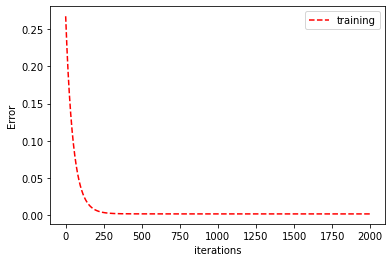

In [30]:
plt.figure()
plt.plot(range(len(error_training)),error_training,'r--',label = 'training')
plt.legend(loc='best')
plt.xlabel('iterations')
plt.ylabel('Error')

In [31]:
print("M=1\nTraining RMS = {}\nValid RMS = {}".format(rms(x_training,y_training,weight_training),rms(x_valid,y_valid,weight_training)))

M=1
Training RMS = 0.06144009611792689
Valid RMS = 0.05158237423453033


M=2，依照題目給的公式先將input做成原本的feature再加上各自兩兩相乘的型態，一樣再代入learning rate = 0.01、迭代2000次的Gradient descent算出最後的RMS。


In [21]:
def TwoDimDf(x):
    m = len(x.columns)
    for i in range(m):
        for j in range(m):
            x = pd.concat([x,x.iloc[:,i]*x.iloc[:,j]],axis=1)
    return x

In [22]:
x_training2 = TwoDimDf(x_training)
x_valid2 = TwoDimDf(x_valid)

In [23]:
x_training2

,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research,GRE_score,0,0,0,0,0,0,0,TOFEL_score,0,0,0,0,0,0,0,University_rating,0,0,0,0,0,0,0,SOP,0,0,0,0,0,0,0,LOR,0,0,0,0,0,0,0,CGPA,0,0,0,0,0,0,0,Research
191,0.577947,0.461700,1.649305,0.631683,1.638123,0.667248,0.885518,0.334023,0.266838,0.953211,0.365079,0.946749,0.385634,0.511783,0.266838,0.213167,0.761485,0.291648,0.756322,0.308068,0.408844,0.953211,0.761485,2.720208,1.041838,2.701764,1.100495,1.460490,0.365079,0.291648,1.041838,0.399023,1.034774,0.421489,0.559367,0.946749,0.756322,2.701764,1.034774,2.683446,1.093034,1.450588,0.385634,0.308068,1.100495,0.421489,1.093034,0.445220,0.590860,0.511783,0.408844,1.460490,0.559367,1.450588,0.590860,0.784143
11,0.932082,0.626123,0.774806,0.631683,1.097845,0.700316,0.885518,0.868776,0.583598,0.722183,0.588780,1.023281,0.652752,0.825375,0.583598,0.392031,0.485124,0.395511,0.687386,0.438484,0.554444,0.722183,0.485124,0.600325,0.489432,0.850617,0.542609,0.686105,0.588780,0.395511,0.489432,0.399023,0.693490,0.442378,0.559367,1.023281,0.687386,0.850617,0.693490,1.205263,0.768838,0.972162,0.652752,0.438484,0.542609,0.442378,0.768838,0.490442,0.620143,0.825375,0.554444,0.686105,0.559367,0.972162,0.620143,0.784143
77,-1.369792,-1.346955,-0.974192,-0.377395,-1.603545,-0.589339,-1.127023,1.876329,1.845047,1.334440,0.516953,2.196523,0.807272,1.543787,1.845047,1.814287,1.312192,0.508334,2.159902,0.793813,1.518049,1.334440,1.312192,0.949050,0.367655,1.562161,0.574130,1.097937,0.516953,0.508334,0.367655,0.142427,0.605170,0.222414,0.425333,2.196523,2.159902,1.562161,0.605170,2.571356,0.945032,1.807233,0.807272,0.793813,0.574130,0.222414,0.945032,0.347321,0.664199,1.543787,1.518049,1.097937,0.425333,1.807233,0.664199,1.270182
341,0.843548,0.461700,-0.099693,0.127144,0.017289,0.303499,0.885518,0.711573,0.389466,-0.084096,0.107252,0.014584,0.256016,0.746977,0.389466,0.213167,-0.046028,0.058702,0.007982,0.140126,0.408844,-0.084096,-0.046028,0.009939,-0.012675,-0.001724,-0.030257,-0.088280,0.107252,0.058702,-0.012675,0.016166,0.002198,0.038588,0.112588,0.014584,0.007982,-0.001724,0.002198,0.000299,0.005247,0.015310,0.256016,0.140126,-0.030257,0.038588,0.005247,0.092112,0.268754,0.746977,0.408844,-0.088280,0.112588,0.015310,0.268754,0.784143
252,0.135279,-1.182531,-0.974192,-0.881934,0.017289,-0.060250,0.885518,0.018300,-0.159972,-0.131788,-0.119307,0.002339,-0.008151,0.119792,-0.159972,1.398381,1.152013,1.042915,-0.020445,0.071248,-1.047153,-0.131788,1.152013,0.949050,0.859173,-0.016843,0.058695,-0.862665,-0.119307,1.042915,0.859173,0.777808,-0.015248,0.053137,-0.780969,0.002339,-0.020445,-0.016843,-0.015248,0.000299,-0.001042,0.015310,-0.008151,0.071248,0.058695,0.053137,-0.001042,0.003630,-0.053353,0.119792,-1.047153,-0.862665,-0.780969,0.015310,-0.053353,0.784143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,-1.015657,-1.840224,0.774806,-0.377395,1.097845,-0.523203,-1.127023,1.031560,1.869037,-0.786938,0.383304,-1.115034,0.531395,1.144670,1.869037,3.386425,-1.425817,0.694492,-2.020281,0.962811,2.073976,-0.786938,-1.425817,0.600325,-0.292408,0.850617,-0.405381,-0.873225,0.383304,0.694492,-0.292408,0.142427,-0.414321,0.197454,0.425333,-1.115034,-2.020281,0.850617,-0.414321,1.205263,-0.574396,-1.237297,0.531395,0.962811,-0.405381,0.197454,-0.574396,0.273742,0.589662,1.144670,2.073976,-0.873225,0.425333,-1.237297,0.589662,1.270182
39,-0.838590,0.132854,-0.974192,0.631683,0.017289,-1.449110,-1.127023,0.703233,-0.111410,0.816948,-0.529723,-0.014498,1.215209,0.945111,-0.111410,0.017650,-0.129425,0.083922,0.002297,-0.192520,-0.149729,0.816948,-0.129425,0.949050,-0.615380,-0.016843,1.411711,1.097937,-0.529723,0.083922,-0.615380,0.399023,0.010921,-0.915378,-0.711921,-0.014498,0.002297,-0.016843,0.010921,0.000299,-0.025054,-0.019485,1.215209,-0.192520,1.411711,-0.915378,-0.

In [32]:
error_training2,weight_training2 = gradient(x_training2,y_training,0.01,2000)

Text(0, 0.5, 'Error')

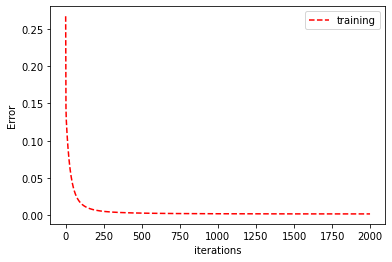

In [33]:
plt.figure()
plt.plot(range(len(error_training2)),error_training2,'r--',label = 'training')
plt.legend(loc='best')
plt.xlabel('iterations')
plt.ylabel('Error')

In [34]:
print("M=2\nTraining RMS = {}\nValid RMS = {}".format(rms(x_training2,y_training,weight_training2),rms(x_valid2,y_valid,weight_training2)))

M=2
Training RMS = 0.059005800736452216
Valid RMS = 0.05458878543852377


由結果可看出在M=1時，雖然Training的RMS表現較M=2時差，但在Valid的RMS表現卻是比較好的。這有可能是在M=2時比M=1有更多over-fitting的問題。

## (b)

我使用L1 Regularization的性質來決定最有貢獻的feature。由於L1的性質能讓更多的參數變為0，利用此特性可用來做feature selection。我在誤差函數中加上Regularization項並套用在gradient descent中，來找出重要的參數。

In [35]:
def gradientReg(x,y,lr,Lambda,iterations):
    weight = [0]*(len(x.columns)+1)
    e = []
    j = 0
    while j<iterations:
        t = weight[1:]*x.iloc[:,0:]
        tn = np.sum(t,axis=1)+weight[0]
        er = error(y,t,weight)
        for i in range(0,len(weight)):
            if i==0:
                weight[0] = weight[0]-lr*(sum((tn-y.iloc[:,0]))/len(x)+Lambda/2)
            else:
                weight[i] = weight[i]-lr*(sum((tn-y.iloc[:,0])*x.iloc[:,i-1])/len(x)+Lambda/2)
        e.append(er)
        j += 1
    return e,weight

In [36]:
error_training3,weight_training3 = gradientReg(x_training,y_training,0.01,0.01,2000)

In [37]:
weight_training3

[0.7152169704307553,
 0.017620798041575264,
 0.01747948606239043,
 0.007925576809003552,
 -0.0003576282911529555,
 0.012036189377204826,
 0.07240692108766486,
 0.011793848450350865]

由上結果可知，CGPA對照的權重參數是最大的，因此可判斷CGPA為最有貢獻的特徵。而SOP及University則相對貢獻較小。